<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prerequisites</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Creating-test-datas" data-toc-modified-id="Creating-test-datas-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating test datas</a></span></li></ul></li><li><span><a href="#Linear-hypothesis" data-toc-modified-id="Linear-hypothesis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear hypothesis</a></span></li><li><span><a href="#Cost-function" data-toc-modified-id="Cost-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cost function</a></span></li><li><span><a href="#Plotting-costfunction" data-toc-modified-id="Plotting-costfunction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting costfunction</a></span><ul class="toc-item"><li><span><a href="#2d" data-toc-modified-id="2d-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>2d</a></span></li><li><span><a href="#3d" data-toc-modified-id="3d-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>3d</a></span></li></ul></li><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gradient descent</a></span><ul class="toc-item"><li><span><a href="#Calculating-new-theta" data-toc-modified-id="Calculating-new-theta-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Calculating new theta</a></span></li><li><span><a href="#Minimizing-costfunction" data-toc-modified-id="Minimizing-costfunction-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Minimizing costfunction</a></span></li><li><span><a href="#Plotting-minimization-process" data-toc-modified-id="Plotting-minimization-process-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plotting minimization process</a></span></li></ul></li><li><span><a href="#Fit-Gerade" data-toc-modified-id="Fit-Gerade-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fit Gerade</a></span></li><li><span><a href="#Trainings-process" data-toc-modified-id="Trainings-process-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Trainings process</a></span></li></ul></div>

# Prerequisites 

## Imports

In [1]:
import numpy as np

# imports for plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

## Creating test datas

In [2]:
size = 100

a = 1
b = 0

In [3]:
x = np.linspace(0, 2, size)
y = np.random.normal(a * x + b, 0.1, size)

In [4]:
print('first 5 x values', x[:5])
print('first 5 y values', y[:5])

first 5 x values [  0.         10.1010101  20.2020202  30.3030303  40.4040404]
first 5 y values [  0.06861762  10.12006562  20.22580723  30.56164107  40.45743841]


# Linear hypothesis

$$
h_{\theta_0, \theta_1}(x) = \theta_0 + \theta_1 * x
$$

In [5]:
def linear_hypothesis(theta_0, theta_1):
    return lambda x: theta_0 + theta_1 * x

In [6]:
hypothesis = linear_hypothesis(2., 3.)
print(hypothesis(np.array([1., 2.])))

[ 5.  8.]


# Cost function

$$
J \left( \Theta _ { 0 } , \Theta _ { 1 } \right) = \frac { 1 } { 2 m } \sum _ { i = 1 } ^ { m } \left( h _ { \theta_0, \theta_1 } \left( x ^ { ( i ) } \right) - y ^ { ( i ) } \right) ^ { 2 }
$$

In [7]:
def cost_function(hypothesis, x, y):
    m = x.shape[0]
    return lambda t0, t1: 1/2*m * np.sum((hypothesis(t0, t1)(x) - y) ** 2, axis=0)

In [8]:
j = cost_function(linear_hypothesis, x, y)
print(j(0, 0))

1674965532.56


# Plotting costfunction

## 2d


Text(0.5, 1.0, 'Kostenfunktion')

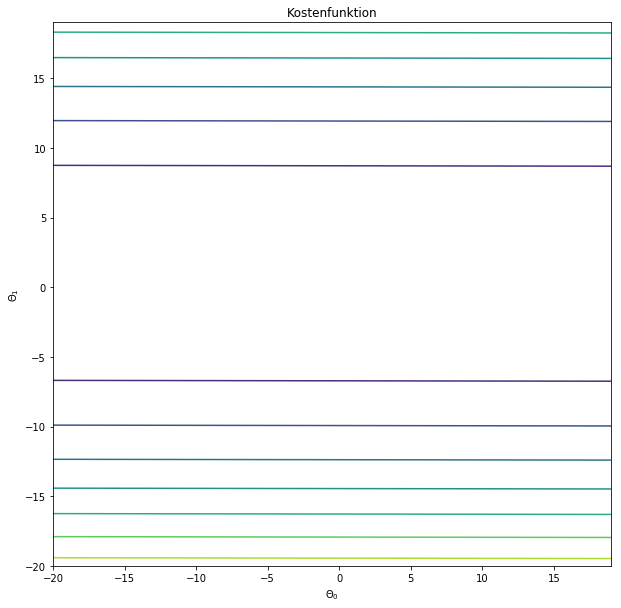

In [9]:
a = 0  # theta 0 boundary
b = 0  # theta 1 boundary
ran = 20.  # range

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0), len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)

plt.figure(figsize=(10, 10))
plt.contour(t0, t1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')

## 3d

Text(0.5, 0.92, 'Costfunction')

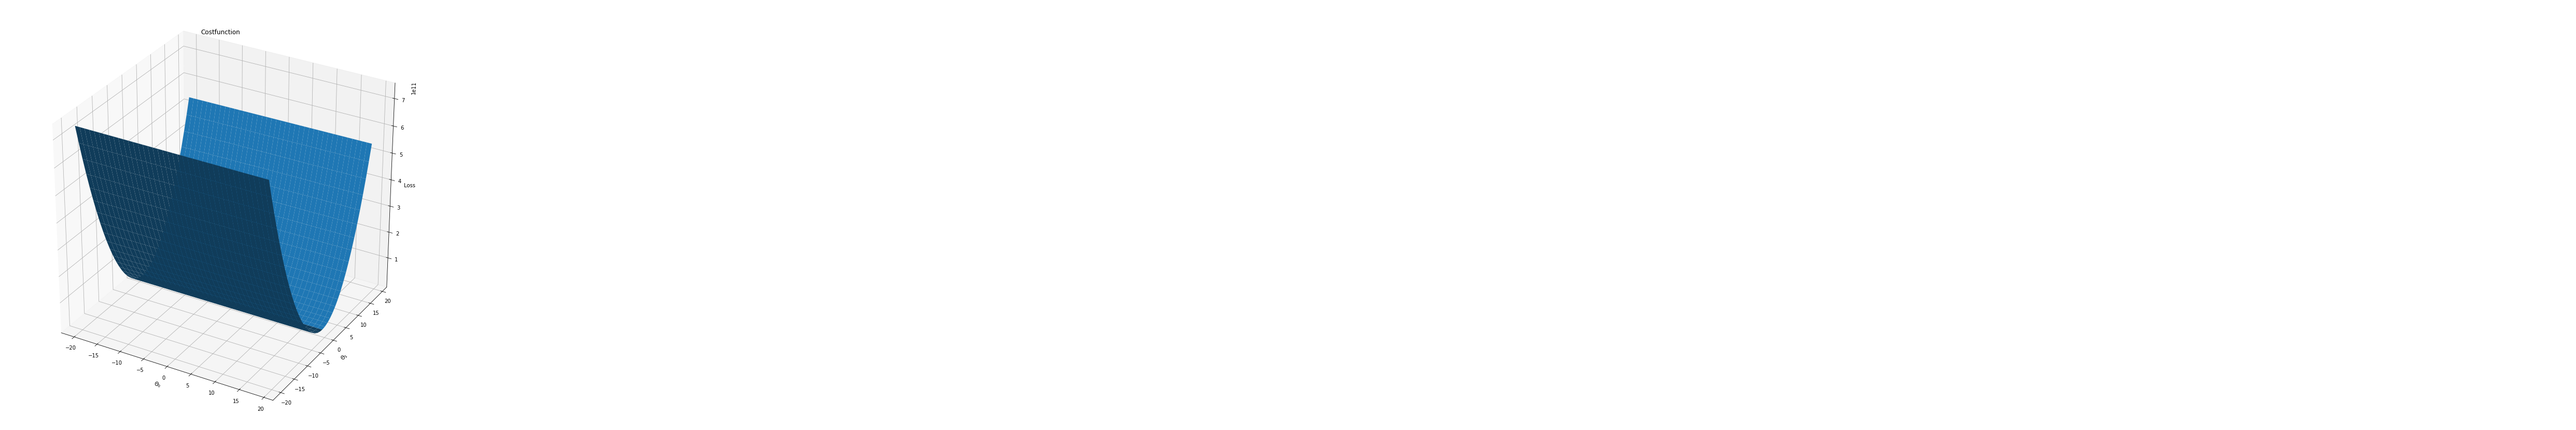

In [10]:
a = 0  # theta 0 boundary
b = 0  # theta 1 boundary
ran = 20.  # range

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0), len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)

T0, T1 = np.meshgrid(t0, t1)

fig = plt.figure(figsize=(15, 15))
ax = fig.gca(projection='3d')
ax.plot_surface(T0, T1, C)
ax.set_xlabel('$\Theta_0$')
ax.set_ylabel('$\Theta_1$')
ax.set_zlabel('Loss')
ax.set_title('Costfunction')

# Gradient descent

## Calculating new theta
$$
\Theta _ { j } ^ { n e u } = \Theta _ { j } ^ { a / t } - \alpha \frac { \partial  J \left( \Theta ^ { a / t } \right) } { \partial \Theta _ { j } } 
$$

$$
\frac { \partial  J \left( \Theta ^ { a / t } \right) } { \partial \Theta _ { 0 } } = 
\frac{\partial}{\partial \Theta_{0}} \frac { 1 } { 2 m } \sum _ { i = 1 } ^ { m } \left( h _ { \theta_0, \theta_1 } \left( x ^ { ( i ) } \right) - y ^ { ( i ) } \right) ^ { 2 } = \frac{1}{m} \sum^m_{i=1}\left( h_{\theta_0, \theta_1} (x^{(i)}) - y^{(i)} \right)
$$

$$
\frac { \partial  J \left( \Theta ^ { a / t } \right) } { \partial \Theta _ { 1 } } = \frac{\partial}{\partial \Theta_{1}} \frac { 1 } { 2 m } \sum _ { i = 1 } ^ { m } \left( h _ { \theta_0, \theta_1 } \left( x ^ { ( i ) } \right) - y ^ { ( i ) } \right) ^ { 2 } = \frac{1}{m} \sum^m_{i=1}\left( h_{\theta_0, \theta_1} (x^{(i)}) - y^{(i)} \right)x^{(i)}
$$

In [11]:
def compute_new_theta(x, y, theta_0, theta_1, alpha):
    m = len(x)
    theta_0_new = theta_0 - alpha * 1 / m * \
        np.sum(theta_0 + theta_1 * x - y)
    theta_1_new = theta_1 - alpha * 1 / m * \
        np.sum((theta_0 + theta_1 * x - y) * x)
    return theta_0_new, theta_1_new

## Minimizing costfunction

In [12]:
iterations = 100
alpha = 0.1

# defining start values
theta_0 = 20
theta_1 = -15

f_cost = cost_function(linear_hypothesis, x, y)

theta_history = []
cost_history = []

for i in range(iterations):
    cost_history.append(f_cost(theta_0, theta_1))
    theta_history.append((theta_0, theta_1))
    theta_0, theta_1 = compute_new_theta(x, y, theta_0, theta_1, alpha)

print('last 5 theta values', theta_history[-5:])
print('last 5 cost values', cost_history[-5:])

last 5 theta values [(nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan)]
last 5 cost values [nan, nan, nan, nan, nan]


/Users/stevenmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stevenmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/Users/stevenmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/Users/stevenmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stevenmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


## Plotting minimization process

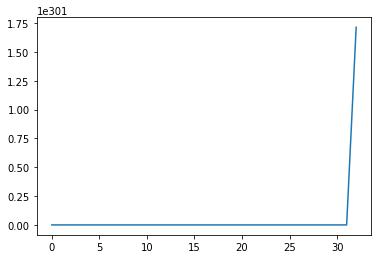

In [13]:
#plt.axis([0, 100, 0, 1e5])
plt.plot(range(0, iterations), cost_history)

In [ ]:
a = 0  # theta 0 boundary
b = 0  # theta 1 boundary
ran = 22.  # range

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0), len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)

T0, T1 = np.meshgrid(t0, t1)

f, ax = plt.subplots(1, figsize=(10, 10))
ax.contour(T0, T1, C)
for i in range(1, iterations):
    ax.annotate('', xy=theta_history[i], xytext=theta_history[i-1],
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')

In [ ]:
a = 0  # theta 0 boundary
b = 0  # theta 1 boundary
ran = 5.  # range

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0), len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)

T0, T1 = np.meshgrid(t0, t1)

f, ax = plt.subplots(1, figsize=(10, 10))
ax.contour(T0, T1, C)
for i in range(1, iterations):
    ax.annotate('', xy=theta_history[i], xytext=theta_history[i-1],
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')

# Fit Gerade

In [ ]:
theta_0 = theta_history[-1][0]
theta_1 = theta_history[-1][1]

In [ ]:
y_hypothese = linear_hypothesis(theta_0, theta_1)(x)

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
#plt.axis([-5, 5, -10, 10])
ax.plot(x, y, 'ro')
ax.plot(x, y_hypothese)

# Trainings process

In [ ]:
def train_and_plot(iteration, learning_rate, theta_0, theta_1, x, y):
    f_cost = cost_function(linear_hypothesis, x, y)
    cost_history = []
    for i in range(iterations):
        cost_history.append(f_cost(theta_0, theta_1))
        theta_0, theta_1 = compute_new_theta(
            x, y, theta_0, theta_1, learning_rate)

    plt.plot(range(0, iterations), cost_history)
    plt.show()
    return cost_history

In [ ]:
train_and_plot(100, 1, 20, -15, x, y)

In [ ]:
train_and_plot(100, 0.1, 20, -15, x, y)

In [ ]:
train_and_plot(100, 0.001, 20, -15, x, y)

In [ ]:
train_and_plot(100, 0.0001, 20, -15, x, y)

In [ ]:
train_and_plot(100, 0.00001, 20, -15, x, y)